In [121]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [122]:
class State(TypedDict):
    number: int
    result: str

In [123]:
graph = StateGraph(State)

In [124]:
def print_number(state: State) -> State:
    print(f"Initial number: {state['number']}")
    return state

def decrement(state: State) -> State:
    state['number'] = state['number'] - 1
    return state

def check_number(state: State):
    if state['number'] <= 0:
        state['result'] = "Finished"
        return "Finished"
    else:
        state['result'] = "decrement"
        return "decrease_number"

def check_current_number(state: State) -> State:
    print(f"Current number: {state['number']}")
    return state

In [125]:
graph.add_node('print_number', print_number)
graph.add_node('decrement', decrement)
graph.add_node('check_number', check_current_number)

In [126]:
graph.add_edge(START, 'print_number')
graph.add_edge('print_number', 'decrement')
graph.add_edge('decrement', 'check_number')
graph.add_conditional_edges('check_number', check_number, {
    "Finished": END,
    "decrease_number": 'decrement'
})


In [127]:
workflow = graph.compile()

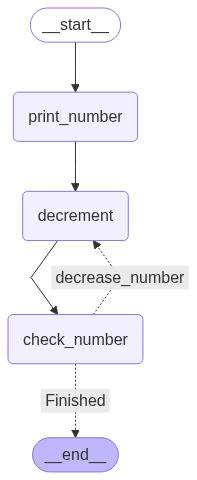

In [128]:
# to visualize the graph, you can use the following code
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [129]:
initial_state = {"number": 5}
result = workflow.invoke(initial_state)

Initial number: 5
Current number: 4
Current number: 3
Current number: 2
Current number: 1
Current number: 0
